In [1]:
# Importar librerías básicas para exploración

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score, roc_auc_score

In [2]:
# Cargar archivo de Excel. Previamente eliminé la primera fila con los nombres relativos de las columnas (X1, etc)

default_df = pd.read_excel('default_credit_card_clients.xls',index_col=0)

In [3]:
# Verificar nombres de las columnas

default_df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [4]:
# Arreglar nombres de columnas para mayor comodidad y verificar resultado

default_df.rename(columns={'PAY_0':'PAY_1'},inplace=True)
default_df.columns = default_df.columns.str.lower().str.replace(' ','_')
default_df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_payment_next_month'],
      dtype='object')

In [5]:
# Check columns type

default_df.dtypes

limit_bal                     int64
sex                           int64
education                     int64
marriage                      int64
age                           int64
pay_1                         int64
pay_2                         int64
pay_3                         int64
pay_4                         int64
pay_5                         int64
pay_6                         int64
bill_amt1                     int64
bill_amt2                     int64
bill_amt3                     int64
bill_amt4                     int64
bill_amt5                     int64
bill_amt6                     int64
pay_amt1                      int64
pay_amt2                      int64
pay_amt3                      int64
pay_amt4                      int64
pay_amt5                      int64
pay_amt6                      int64
default_payment_next_month    int64
dtype: object

In [6]:
# Conocer valores número único de valores en las columnas tanto absoluto como relativo a tamaño de dataframe
# Conocer tamaño del dataframe
num_rows, num_cols  = default_df.shape
print('Rows: ',num_rows)
print('Columns: ',num_cols)
print('')
print('Unique column values: ')
for i in default_df.columns:
    print('Column name: ',i)
    print('Count: ',default_df[i].unique().shape[0])
    print('Count: ',round(default_df[i].unique().shape[0]/num_rows,4)*100,'%')
    print('')

Rows:  30000
Columns:  24

Unique column values: 
Column name:  limit_bal
Count:  81
Count:  0.27 %

Column name:  sex
Count:  2
Count:  0.01 %

Column name:  education
Count:  7
Count:  0.02 %

Column name:  marriage
Count:  4
Count:  0.01 %

Column name:  age
Count:  56
Count:  0.19 %

Column name:  pay_1
Count:  11
Count:  0.04 %

Column name:  pay_2
Count:  11
Count:  0.04 %

Column name:  pay_3
Count:  11
Count:  0.04 %

Column name:  pay_4
Count:  11
Count:  0.04 %

Column name:  pay_5
Count:  10
Count:  0.03 %

Column name:  pay_6
Count:  10
Count:  0.03 %

Column name:  bill_amt1
Count:  22723
Count:  75.74 %

Column name:  bill_amt2
Count:  22346
Count:  74.49 %

Column name:  bill_amt3
Count:  22026
Count:  73.42 %

Column name:  bill_amt4
Count:  21548
Count:  71.83 %

Column name:  bill_amt5
Count:  21010
Count:  70.03 %

Column name:  bill_amt6
Count:  20604
Count:  68.67999999999999 %

Column name:  pay_amt1
Count:  7943
Count:  26.479999999999997 %

Column name:  pay_amt

In [7]:
# La descripción del dataset enunciaba que no había datos nulos pero compruebo.

print('Unique column values: ')
for i in default_df.columns:
    print('Column name: ',i)
    print('Count: ',(default_df[i].isna()).sum())
    print('')

Unique column values: 
Column name:  limit_bal
Count:  0

Column name:  sex
Count:  0

Column name:  education
Count:  0

Column name:  marriage
Count:  0

Column name:  age
Count:  0

Column name:  pay_1
Count:  0

Column name:  pay_2
Count:  0

Column name:  pay_3
Count:  0

Column name:  pay_4
Count:  0

Column name:  pay_5
Count:  0

Column name:  pay_6
Count:  0

Column name:  bill_amt1
Count:  0

Column name:  bill_amt2
Count:  0

Column name:  bill_amt3
Count:  0

Column name:  bill_amt4
Count:  0

Column name:  bill_amt5
Count:  0

Column name:  bill_amt6
Count:  0

Column name:  pay_amt1
Count:  0

Column name:  pay_amt2
Count:  0

Column name:  pay_amt3
Count:  0

Column name:  pay_amt4
Count:  0

Column name:  pay_amt5
Count:  0

Column name:  pay_amt6
Count:  0

Column name:  default_payment_next_month
Count:  0



De acuerdo al resultado anterior, todas las variables exógenas o predictivas hasta la 11, son variables no continuas.

A pesar de eso, tanto *limit_bal* como *age* son variables ordinales (de acuerdo a su descripción) además de tener suficientes valores diferentes. Por esto las trateré como variables continuas para facilitar su análisis.

Las variables *pay_n*  (n de 1 a 6) son variables categóricas pero con trasfondo ordinal y por lo tanto serán tratadas como tal.

In [8]:
# Partir dataframe en variables exógenas y endógena de acuerdo a la descripción del link compartido

default_vars = default_df.iloc[:,:-1]
default_y = default_df['default_payment_next_month']

# Variable analysis and description

### limit_bal
Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: limit_bal, dtype: float64


<AxesSubplot:>

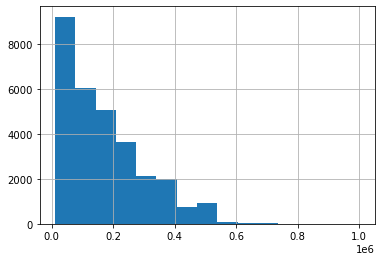

In [9]:
print(default_vars['limit_bal'].describe())
default_vars['limit_bal'].hist(bins=15)

### sex
Gender (1 = male; 2 = female)

In [10]:
default_vars['sex'].value_counts(sort=False)

1    11888
2    18112
Name: sex, dtype: int64

### education
Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

In [11]:
default_vars['education'].value_counts(sort=False)

0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: education, dtype: int64

### marriage
 Marital status (1 = married; 2 = single; 3 = others)

In [12]:
default_vars['marriage'].value_counts(sort=False)

0       54
1    13659
2    15964
3      323
Name: marriage, dtype: int64

### age
Age (year)

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: age, dtype: float64


<AxesSubplot:>

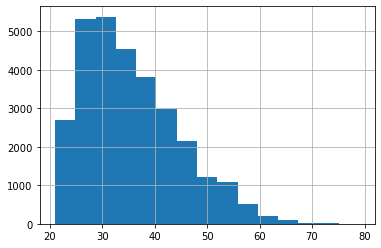

In [13]:
print(default_vars['age'].describe())
default_vars['age'].hist(bins=15)

### pay_n (n between 1 and 6)
History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above

In [14]:
for i in range(1,7):
    var_name = 'pay_'+str(i)
    print(var_name)
    print(default_vars[var_name].value_counts(sort=False))
    print('')

pay_1
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
-2     2759
-1     5686
Name: pay_1, dtype: int64

pay_2
 0    15730
 1       28
 2     3927
 3      326
 4       99
 5       25
 6       12
 7       20
 8        1
-2     3782
-1     6050
Name: pay_2, dtype: int64

pay_3
 0    15764
 1        4
 2     3819
 3      240
 4       76
 5       21
 6       23
 7       27
 8        3
-2     4085
-1     5938
Name: pay_3, dtype: int64

pay_4
 0    16455
 1        2
 2     3159
 3      180
 4       69
 5       35
 6        5
 7       58
 8        2
-2     4348
-1     5687
Name: pay_4, dtype: int64

pay_5
 0    16947
 2     2626
 3      178
 4       84
 5       17
 6        4
 7       58
 8        1
-2     4546
-1     5539
Name: pay_5, dtype: int64

pay_6
 0    16286
 2     2766
 3      184
 4       49
 5       13
 6       19
 7       46
 8        2
-2     4895
-1     5740
Name: pay_6, dtype: int64



What are *-2* and *0*. They are not described as a possible values for the variable in the metadata

I want to check next possible values of *pay_n* given the status at *pay_(n-1)*

In [15]:
for i in range(2,7):
    var_aux = 'pay_'+str(i)
    prev_var = 'pay_'+str(i-1)
    
    for j in np.linspace(-2,8,11).astype('int'):
        print(var_aux)
        print('previous_var_value: ',str(j))
        print(default_vars.loc[default_vars[prev_var]==j,var_aux].value_counts())
        print('')

pay_2
previous_var_value:  -2
-2    2561
-1     193
 2       5
Name: pay_2, dtype: int64

pay_2
previous_var_value:  -1
-1    4641
 0     603
 2     387
 3      47
 4       5
 5       3
Name: pay_2, dtype: int64

pay_2
previous_var_value:  0
 0    14259
-1      478
Name: pay_2, dtype: int64

pay_2
previous_var_value:  1
 2    1672
-2    1221
-1     612
 3     109
 4      32
 1      28
 5       7
 0       3
 6       2
 7       1
 8       1
Name: pay_2, dtype: int64

pay_2
previous_var_value:  2
 2    1591
 0     865
-1     126
 3      71
 4      14
Name: pay_2, dtype: int64

pay_2
previous_var_value:  3
2    272
3     41
4      8
5      1
Name: pay_2, dtype: int64

pay_2
previous_var_value:  4
3    58
4    15
5     3
Name: pay_2, dtype: int64

pay_2
previous_var_value:  5
4    25
6     1
Name: pay_2, dtype: int64

pay_2
previous_var_value:  6
5    11
Name: pay_2, dtype: int64

pay_2
previous_var_value:  7
6    9
Name: pay_2, dtype: int64

pay_2
previous_var_value:  8
7    19
Name: pay_2

There seems to be issues with data quality. Given that *pay_n* is equal to *j*, *pay_(n+1)* should be less than or equal to *j+1* very time. That is, if I am late by j months in my payments, I should be maximum *j+1* months late in my payments the next month. I could pay my whole debt or some debt also.

### bill_amt
Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005

bill_amt1
count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: bill_amt1, dtype: float64


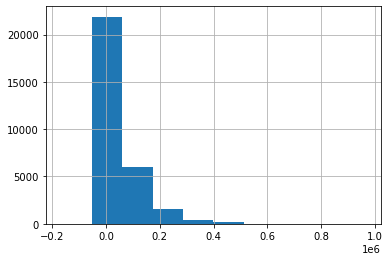


bill_amt2
count     30000.000000
mean      49179.075167
std       71173.768783
min      -69777.000000
25%        2984.750000
50%       21200.000000
75%       64006.250000
max      983931.000000
Name: bill_amt2, dtype: float64


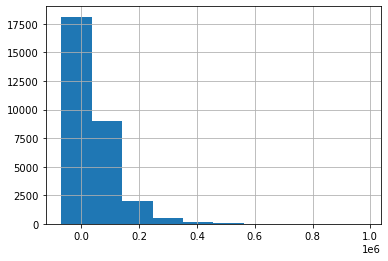


bill_amt3
count    3.000000e+04
mean     4.701315e+04
std      6.934939e+04
min     -1.572640e+05
25%      2.666250e+03
50%      2.008850e+04
75%      6.016475e+04
max      1.664089e+06
Name: bill_amt3, dtype: float64


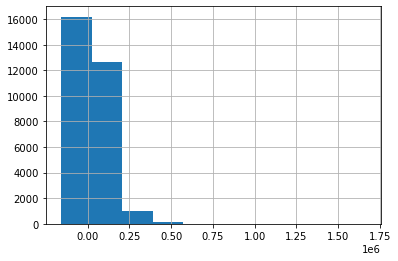


bill_amt4
count     30000.000000
mean      43262.948967
std       64332.856134
min     -170000.000000
25%        2326.750000
50%       19052.000000
75%       54506.000000
max      891586.000000
Name: bill_amt4, dtype: float64


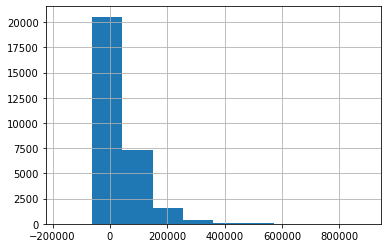


bill_amt5
count     30000.000000
mean      40311.400967
std       60797.155770
min      -81334.000000
25%        1763.000000
50%       18104.500000
75%       50190.500000
max      927171.000000
Name: bill_amt5, dtype: float64


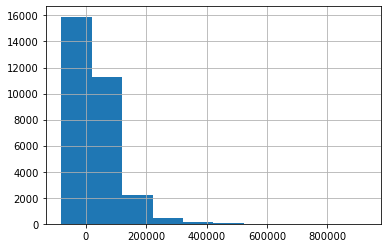


bill_amt6
count     30000.000000
mean      38871.760400
std       59554.107537
min     -339603.000000
25%        1256.000000
50%       17071.000000
75%       49198.250000
max      961664.000000
Name: bill_amt6, dtype: float64


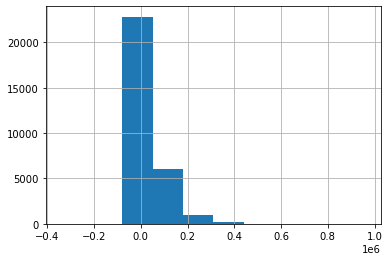

In [16]:
for i in range(1,7):
    var_name = 'bill_amt'+str(i)
    print(var_name)
    print(default_vars[var_name].describe())
    default_vars[var_name].hist()
    plt.show()
    print('')

There seems to be the possibility to pay on advance, since there are bills with negative value

In [17]:
# I want to check the distribution of the bill for a month, given the status of payment in the previous month
# For that matter, I will concatenate the columns of a given month previous payment status with the current month
# bill one dataframe below the other.

aux_df = pd.DataFrame(columns = ['pay_prev_month','bill_current_month'],dtype='int')
for i in range(2,7):
    var_name1 = 'pay_'+str(i-1)
    var_name2 = 'bill_amt'+str(i)
    
    concat_df = default_vars.loc[:,[var_name1,var_name2]].copy()
    concat_df.columns = ['pay_prev_month','bill_current_month']
    aux_df=pd.concat([aux_df,concat_df],axis=0,join='inner')
aux_df.reset_index(drop=True,inplace=True)

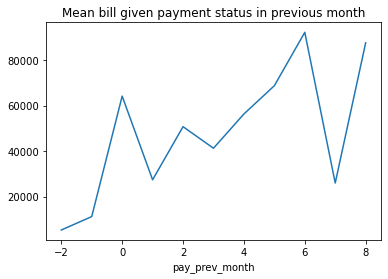

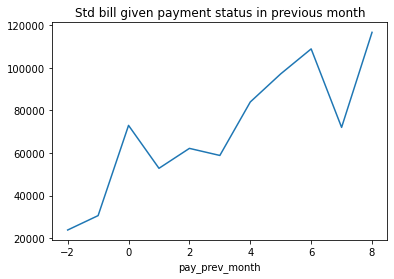

In [18]:
# Now, I will check the conditional distribution

tmp_df = aux_df.groupby('pay_prev_month').agg({'bill_current_month':['mean','std']})
tmp_df.columns=['mean_bill','std_bill']
tmp_df['mean_bill'].plot()
plt.title('Mean bill given payment status in previous month')
plt.show()
tmp_df['std_bill'].plot()
plt.title('Std bill given payment status in previous month')
plt.show()

### pay_amt
Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005

pay_amt1
count     30000.000000
mean       5663.580500
std       16563.280354
min           0.000000
25%        1000.000000
50%        2100.000000
75%        5006.000000
max      873552.000000
Name: pay_amt1, dtype: float64


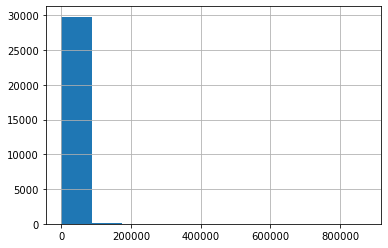


pay_amt2
count    3.000000e+04
mean     5.921163e+03
std      2.304087e+04
min      0.000000e+00
25%      8.330000e+02
50%      2.009000e+03
75%      5.000000e+03
max      1.684259e+06
Name: pay_amt2, dtype: float64


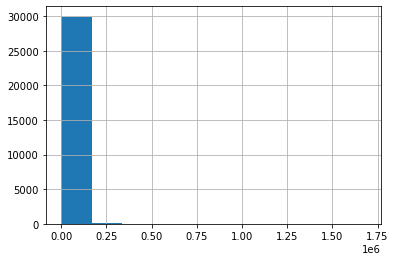


pay_amt3
count     30000.00000
mean       5225.68150
std       17606.96147
min           0.00000
25%         390.00000
50%        1800.00000
75%        4505.00000
max      896040.00000
Name: pay_amt3, dtype: float64


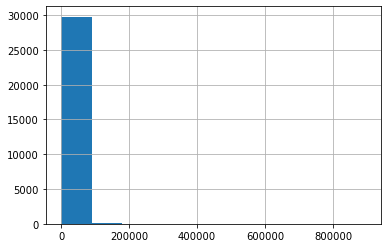


pay_amt4
count     30000.000000
mean       4826.076867
std       15666.159744
min           0.000000
25%         296.000000
50%        1500.000000
75%        4013.250000
max      621000.000000
Name: pay_amt4, dtype: float64


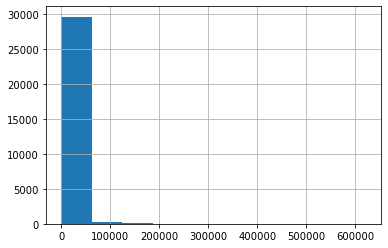


pay_amt5
count     30000.000000
mean       4799.387633
std       15278.305679
min           0.000000
25%         252.500000
50%        1500.000000
75%        4031.500000
max      426529.000000
Name: pay_amt5, dtype: float64


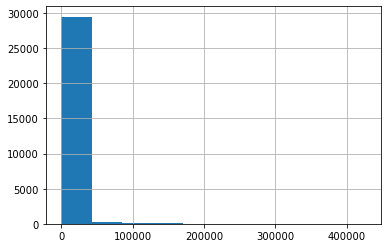


pay_amt6
count     30000.000000
mean       5215.502567
std       17777.465775
min           0.000000
25%         117.750000
50%        1500.000000
75%        4000.000000
max      528666.000000
Name: pay_amt6, dtype: float64


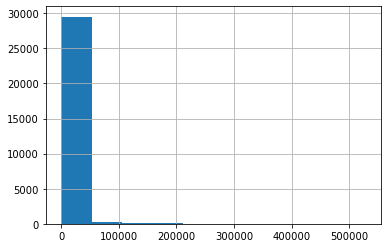

In [19]:
for i in range(1,7):
    var_name = 'pay_amt'+str(i)
    print(var_name)
    print(default_vars[var_name].describe())
    default_vars[var_name].hist()
    plt.show()
    print('')

In [20]:
# I would like to understand the relation between bill and payment. For example, clients that pay more than the 
# billed amount.

aux_df = pd.DataFrame(columns = ['billed_amount','payed_amount'],dtype='int')
for i in range(2,7):
    var_name1 = 'bill_amt'+str(i)
    var_name2 = 'pay_amt'+str(i)
    
    concat_df = default_vars.loc[:,[var_name1,var_name2]].copy()
    concat_df.columns = ['billed_amount','payed_amount']
    aux_df=pd.concat([aux_df,concat_df],axis=0,join='inner')
aux_df.reset_index(drop=True,inplace=True)
aux_df

,billed_amount,payed_amount
0,3102,689
1,1725,1000
2,14027,1500
3,48233,2019
4,5670,36681
...,...,...
149995,15980,1000
149996,0,0
149997,19357,3100
149998,48944,1804


In [21]:
tmp_df = aux_df[(aux_df['billed_amount']>0)&
               (aux_df['payed_amount']>0)].copy()
(tmp_df['payed_amount']/tmp_df['billed_amount']).describe()

count    113332.000000
mean          1.874070
std          53.117541
min           0.000003
25%           0.037430
50%           0.061058
75%           0.355724
max        8891.357143
dtype: float64

In [22]:
# There seems to be payments way beyond what is billed. I want to check those individual cases, at least amount
# wise (since in the dataframe I created I did not keep indexes, except for the first 30k rows)

tmp_df[(tmp_df['payed_amount']/tmp_df['billed_amount'])>100]

,billed_amount,payed_amount
359,291,51058
2651,75,12117
3400,1572,166235
3412,3,13333
3414,249,27477
...,...,...
147240,22,5000
147555,390,96702
148667,25,7140
149584,96,19637


Many more things could be done regarding data exploration. Due to time constrains I will limit to the ones I already did.

Some examples:
1. Check relational behavior between payment status and actual payment (temporal). <br>
2. Check variables dependendencies (education vs. payment status behavior, marriage status vs. educational status, etc...)<br>
3. Calculate number of payments in zero by clients and analyse behavior against other variables.<br>
<br>
And many more

# Predictive potential

In [23]:
# Percentage of defaults in the month given client's sex

default_df.groupby('sex')[['default_payment_next_month']].agg(['mean','count','std'])

default_payment_next_month                 
                          mean  count       std
sex                                            
1                     0.241672  11888  0.428115
2                     0.207763  18112  0.405717

In [24]:
# Percentage of defaults in the month given client's education category

default_df.groupby('education')[['default_payment_next_month']].agg(['mean','count','std'])

default_payment_next_month                 
                                mean  count       std
education                                            
0                           0.000000     14  0.000000
1                           0.192348  10585  0.394163
2                           0.237349  14030  0.425473
3                           0.251576   4917  0.433963
4                           0.056911    123  0.232619
5                           0.064286    280  0.245700
6                           0.156863     51  0.367290

In [25]:
# Percentage of defaults in the month given client's marriage category

default_df.groupby('marriage')[['default_payment_next_month']].agg(['mean','count','std'])

default_payment_next_month                 
                               mean  count       std
marriage                                            
0                          0.092593     54  0.292582
1                          0.234717  13659  0.423837
2                          0.209283  15964  0.406810
3                          0.260062    323  0.439349

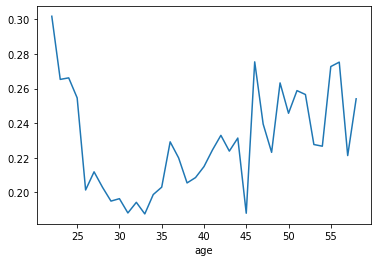

In [26]:
# Percentage of defaults in the month given client's age

aux_df = default_df.groupby('age')[['default_payment_next_month']].agg(['mean','count','std'])
aux_df.columns = ['mean','count','std']
aux_df.loc[aux_df['count']>=100,'mean'].plot()
plt.show()

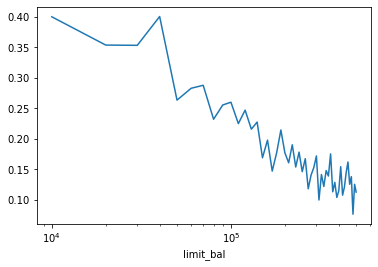

In [27]:
# Aproximante conditional distribution of defaults given client's credit amount

aux_df = default_df.groupby('limit_bal')[['default_payment_next_month']].agg(['mean','count','std'])
aux_df.columns = ['mean','count','std']
aux_df.loc[aux_df['count']>=30,'mean'].plot(logx=True)
plt.show()

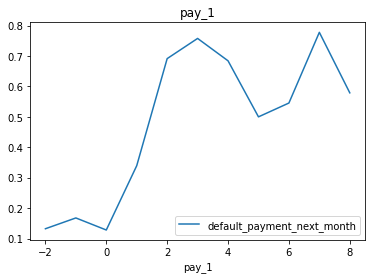

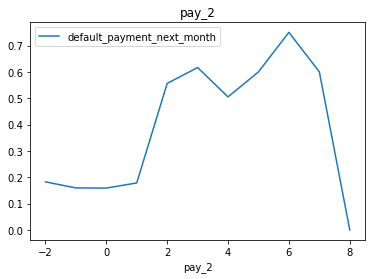

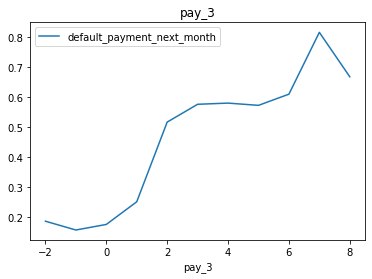

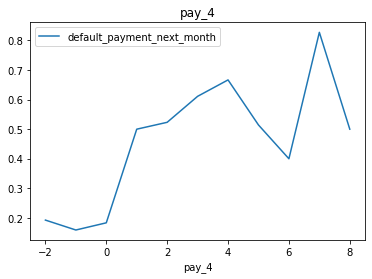

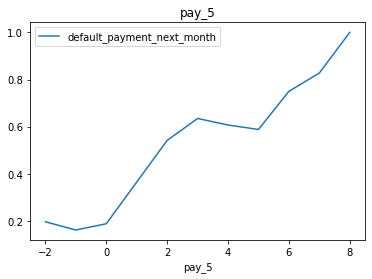

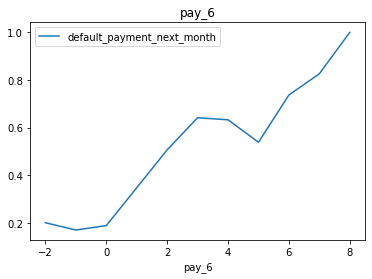

In [28]:
# Percentage of defaults given each one of the delays in the payments status

for i in range(1,7):
    var_name = 'pay_'+str(i)
    default_df.groupby(var_name)[['default_payment_next_month']].mean().plot(title=var_name)

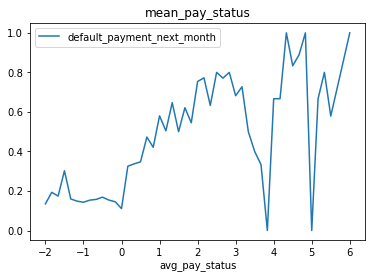

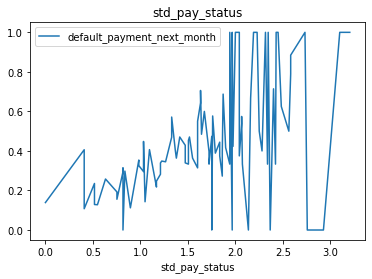

In [29]:
# Percentage of defaults given clients average and std in their payment status

aux_df = default_df.copy()
aux_cols = aux_df.columns[(aux_df.columns.str.len() == 5)&
               (aux_df.columns.str.contains('pay_'))]
aux_df['avg_pay_status'] = aux_df[aux_cols].mean(axis=1)
aux_df['std_pay_status'] = aux_df[aux_cols].std(axis=1)
aux_df.groupby('avg_pay_status')[['default_payment_next_month']].mean().plot(title = 'mean_pay_status')
plt.show()
aux_df.groupby('std_pay_status')[['default_payment_next_month']].mean().plot(title = 'std_pay_status')
plt.show()

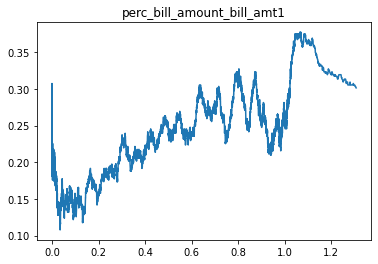

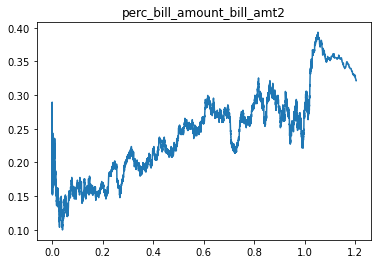

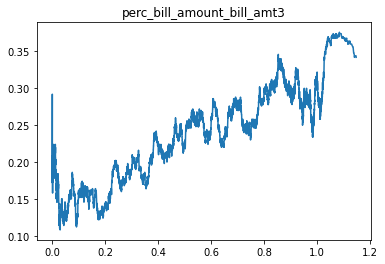

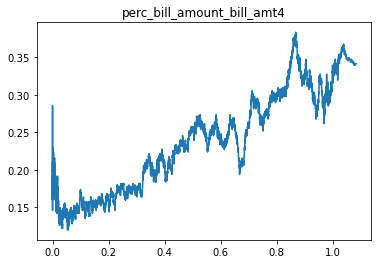

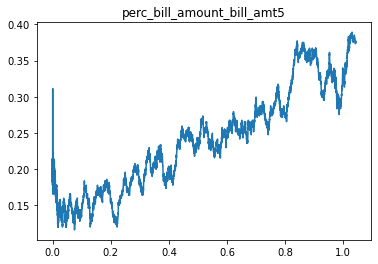

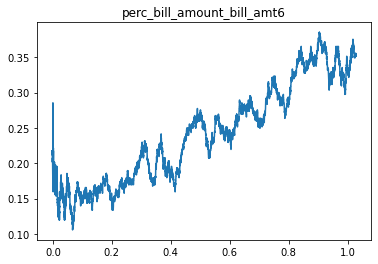

In [30]:
# Aproximation of conditional distribution of default, given clients billing behavior. I used the percentage of the
# bill amount over the client's credit amount instead of directy using the billed amount. This, because the
# billed amount without context I think could be misleading.

for i in range(1,7):
    var_name = 'bill_amt'+str(i)
    var_name2 = 'perc_bill_amount_'+var_name
    aux_df = default_df.copy()
    aux_df[var_name2] = aux_df[var_name] / aux_df['limit_bal']
    aux_df.sort_values(var_name2, inplace=True)
    aux_df['rolling_default'] = aux_df[['default_payment_next_month']].rolling(501,center=True).mean()
    aux_df = aux_df.loc[~aux_df['rolling_default'].isna(),[var_name2,'rolling_default']]
    plt.plot(aux_df[var_name2],aux_df['rolling_default'])
    plt.title(var_name2)
    plt.show()

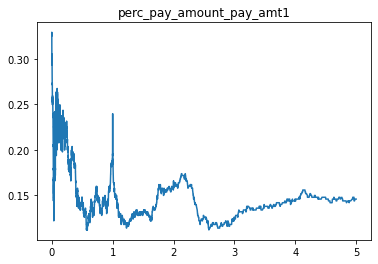

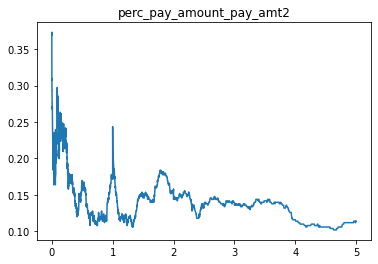

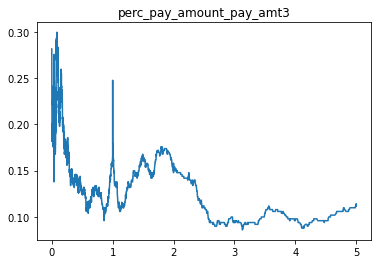

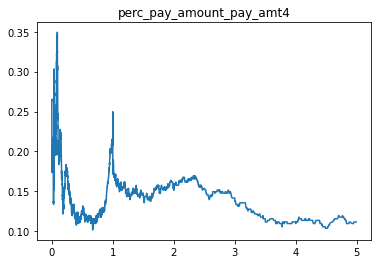

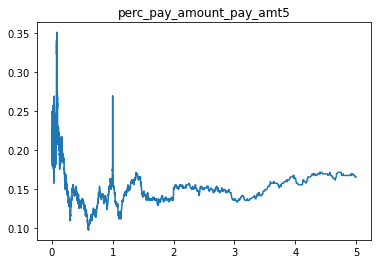

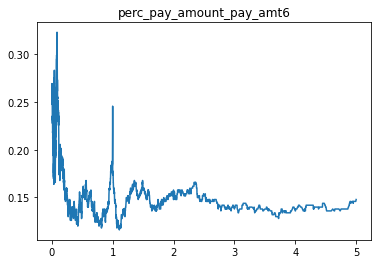

In [31]:
# Aproximation of conditional distribution of default, given clients payment behavior. I used the percentage of the
# payment amount over the client's billed amount instead of directy using the billed payment amount. This, because 
# the payment amount without context I think could be misleading.

for i in range(1,7):
    var_name = 'pay_amt'+str(i)
    var_name1 = 'bill_amt'+str(i)
    var_name2 = 'perc_pay_amount_'+var_name
    aux_df = default_df.copy()
    aux_df[var_name2] = aux_df[var_name] / aux_df[var_name1]
    aux_df.sort_values(var_name2, inplace=True)
    aux_df['rolling_default'] = aux_df[['default_payment_next_month']].rolling(501,center=True).mean()
    aux_df = aux_df.loc[(~aux_df['rolling_default'].isna())&
                        (aux_df[var_name2]<=5)&
                        (aux_df[var_name2]>0),[var_name2,'rolling_default']]
    plt.plot(aux_df[var_name2],aux_df['rolling_default'])
    plt.title(var_name2)
    plt.show()

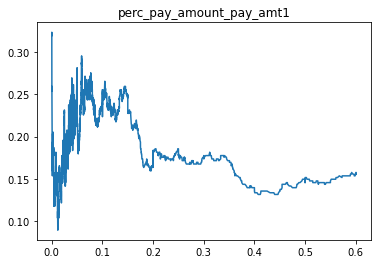

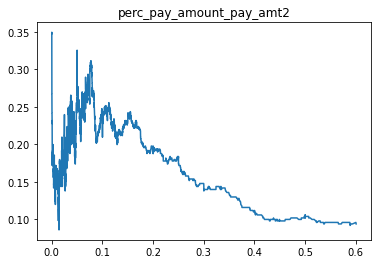

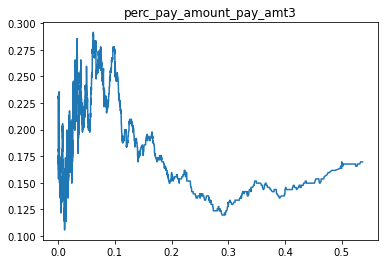

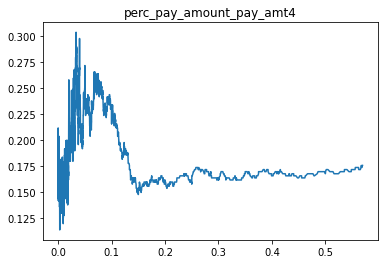

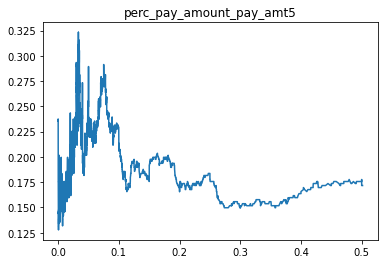

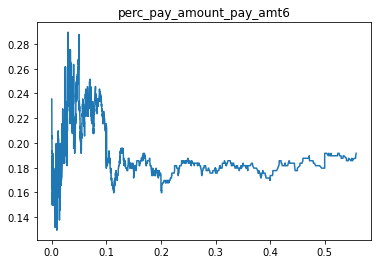

In [32]:
# Aproximation of conditional distribution of default, given clients payment behavior. I used the percentage of the
# payment amount over the client's credit amount instead of directy using the billed payment amount. This, because 
# the payment amount without context I think could be misleading.

for i in range(1,7):
    var_name = 'pay_amt'+str(i)
    var_name1 = 'limit_bal'
    var_name2 = 'perc_pay_amount_'+var_name
    aux_df = default_df.copy()
    aux_df[var_name2] = aux_df[var_name] / aux_df[var_name1]
    aux_df.sort_values(var_name2, inplace=True)
    aux_df['rolling_default'] = aux_df[['default_payment_next_month']].rolling(501,center=True).mean()
    aux_df = aux_df.loc[(~aux_df['rolling_default'].isna())&
                        (aux_df[var_name2]<=5)&
                        (aux_df[var_name2]>0),[var_name2,'rolling_default']]
    plt.plot(aux_df[var_name2],aux_df['rolling_default'])
    plt.title(var_name2)
    plt.show()

# Data preparation and variable creation

In [33]:
# I will force categorical variables into dummies so the model can work. This requires that categories with few
# representatives get combined.

aux_default_vars = default_vars.copy()

aux_default_vars['marriage'] = np.where((aux_default_vars['marriage']==1)|
                                        (aux_default_vars['marriage']==2),
                                        aux_default_vars['marriage'],0)

aux_default_vars['education'] = np.where((aux_default_vars['education']==1)|
                                         (aux_default_vars['education']==2)|
                                         (aux_default_vars['education']==3),
                                         aux_default_vars['education'],0)

aux_default_vars['sex'] = aux_default_vars['sex'] - 1

In [34]:
aux_sex_categories = aux_default_vars[['sex']]

aux_education_categories = pd.get_dummies(aux_default_vars['education']).iloc[:,:-1]
aux_education_categories.columns = ['0_education','1_education','2_education']

aux_marriage_categories = pd.get_dummies(aux_default_vars['marriage']).iloc[:,:-1]
aux_marriage_categories.columns = ['0_marriage','1_marriage']

In [35]:
default_final_vars = pd.concat([aux_sex_categories,aux_education_categories,aux_marriage_categories],
                               axis=1,join='inner')

In [36]:
aux_df = aux_default_vars.copy()
aux_cols = aux_default_vars.columns[(aux_default_vars.columns.str.len() == 5)&
                                   (aux_default_vars.columns.str.contains('pay_'))]
aux_df['avg_pay_status'] = aux_df[aux_cols].mean(axis=1)
aux_df['std_pay_status'] = aux_df[aux_cols].std(axis=1)
aux_df['max_pay_status'] = aux_df[aux_cols].max(axis=1)
aux_df['min_pay_status'] = aux_df[aux_cols].min(axis=1)
aux_df['last_pay_status'] = aux_df['pay_6']
aux_df = aux_df[['avg_pay_status','std_pay_status','max_pay_status','min_pay_status','last_pay_status']]

In [37]:
default_final_vars = pd.concat([default_final_vars,aux_df],axis=1,join='inner')

In [38]:
aux_df = aux_default_vars.copy()
tmp_df = pd.DataFrame(index = aux_df.index)

for i in range(1,7):
    var_name = 'pay_amt'+str(i)
    var_name1 = 'bill_amt'+str(i)
    var_name2 = 'perc_pay_amount_'+var_name
    tmp_df = pd.concat([tmp_df , 
                        pd.DataFrame(aux_df[var_name] / aux_df[var_name1],
                                     index = tmp_df.index, columns = [var_name2])],
                      axis=1,join='inner')
    tmp_df.loc[tmp_df[var_name2]==np.inf,var_name2] = 1
tmp_df.fillna(1,inplace=True)

In [39]:
mean_df = pd.DataFrame(tmp_df.mean(axis=1), columns = ['mean_payment_perc'])
std_df = pd.DataFrame(tmp_df.std(axis=1), columns = ['std_payment_perc'])
max_df = pd.DataFrame(tmp_df.max(axis=1), columns = ['max_payment_perc'])
min_df = pd.DataFrame(tmp_df.min(axis=1), columns = ['min_payment_perc'])
last_df = pd.DataFrame(tmp_df.iloc[:,5])
last_df.columns = ['last_payment_perc']
tmp_df = pd.concat([mean_df,std_df,max_df,min_df,last_df],axis=1,join='inner')

In [40]:
default_final_vars = pd.concat([default_final_vars,tmp_df],axis=1,join='inner')

In [41]:
aux_df = aux_default_vars.copy()
tmp_df = pd.DataFrame(index = aux_df.index)

for i in range(1,7):
    var_name = 'bill_amt'+str(i)
    var_name2 = 'perc_bill_amount_'+var_name
    tmp_df = pd.concat([tmp_df , 
                        pd.DataFrame(aux_df[var_name] / aux_df['limit_bal'],
                                     index = tmp_df.index, columns = [var_name2])],
                      axis=1,join='inner')
    tmp_df.loc[tmp_df[var_name2]==np.inf,var_name2] = 1

In [42]:
mean_df = pd.DataFrame(tmp_df.mean(axis=1), columns = ['mean_bill_perc'])
std_df = pd.DataFrame(tmp_df.std(axis=1), columns = ['std_bill_perc'])
max_df = pd.DataFrame(tmp_df.max(axis=1), columns = ['max_bill_perc'])
min_df = pd.DataFrame(tmp_df.min(axis=1), columns = ['min_bill_perc'])
last_df = pd.DataFrame(tmp_df.iloc[:,5])
last_df.columns = ['last_bill_perc']
tmp_df = pd.concat([mean_df,std_df,max_df,min_df,last_df],axis=1,join='inner')

In [43]:
default_final_vars = pd.concat([default_final_vars,tmp_df],axis=1,join='inner')

In [44]:
default_final_vars = pd.concat([default_final_vars,aux_default_vars[['limit_bal','age']]],axis=1,join='inner')

# Model training

### Class imbalance

In [45]:
default_y.value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

### Train, test split (stratified by class imbalance)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(default_final_vars, default_y, test_size=0.3, 
                                                        stratify=default_y,random_state=123)

# No ejecutar los siguientes chunks (son muy pesados)

### Model initialization + cross validation with further split

In [90]:
# Estos hiper parámetros los utilicé en principio pero me di cuenta que con max_depth de 5 se obtienen mejores
# resultados. Así como con min_samples_split_altos y max_features bajos (al menos al optimizar recall)
hiper_params = dict()
hiper_params['max_depth'] = [5, 10, 15, 20, 25]
hiper_params['min_samples_split'] = [10, 25, 50, 100, 150]
hiper_params['max_features'] = [5, 10, 15, 20]

In [100]:
hiper_params = dict()
hiper_params['max_depth'] = [5]
hiper_params['min_samples_split'] = [150,175,200]
hiper_params['max_features'] = [5, 7, 10]

In [101]:
k = 10
results_df = pd.DataFrame(columns = ['Val_acc','Val_rec','Val_prec','Val_auc'],index=range(k))
agg_results_df = pd.DataFrame(columns = ['params','mean_acc','mean_rec','mean_prec','mean_auc',
                                        'std_acc','std_rec','std_prec','std_auc'])

for s in hiper_params['max_depth']:
    for h in hiper_params['min_samples_split']:
        for j in hiper_params['max_features']:
            
            param_dict = [{'max_depth':str(s),
                          'min_samples_split':str(h),
                          'max_features':str(j)}]

            rf = RandomForestClassifier(n_estimators=100, bootstrap=True, max_depth=s, min_samples_split=h,
                                        max_features=j, class_weight='balanced_subsample', max_samples=0.8)

            for i in range(k):
                X_val_train, X_val, y_val_train, y_val = train_test_split(X_train, y_train, test_size=0.2, 
                                                                    stratify=y_train,random_state=i)

                rf.fit(X_val_train, y_val_train)
                y_pred_val = rf.predict(X_val)

                results_df.iloc[i,:] = accuracy_score(y_val, y_pred_val), recall_score(y_val, y_pred_val), precision_score(y_val, y_pred_val), roc_auc_score(y_val, y_pred_val)

            agg_tmp_df = np.zeros(shape=(1,8))
            agg_tmp_df[0,0:4] = results_df.mean(axis=0)
            agg_tmp_df[0,4:] = results_df.std(axis=0)
            agg_tmp_df = pd.DataFrame(agg_tmp_df, columns = ['mean_acc','mean_rec','mean_prec','mean_auc',
                                                            'std_acc','std_rec','std_prec','std_auc'])
            agg_tmp_df['params'] = param_dict
            agg_tmp_df = agg_tmp_df[['params','mean_acc','mean_rec','mean_prec','mean_auc',
                                    'std_acc','std_rec','std_prec','std_auc']]
            print(agg_tmp_df)
            agg_results_df = pd.concat([agg_results_df,agg_tmp_df], join='inner',axis=0)

                                              params  mean_acc  mean_rec  \
0  {'max_depth': '5', 'min_samples_split': '150',...  0.745667  0.652099   

   mean_prec  mean_auc   std_acc   std_rec  std_prec   std_auc  
0   0.448537   0.71217  0.005171  0.011423  0.007458  0.006052  
                                              params  mean_acc  mean_rec  \
0  {'max_depth': '5', 'min_samples_split': '150',...  0.745214  0.653821   

   mean_prec  mean_auc   std_acc   std_rec  std_prec   std_auc  
0   0.448011  0.712496  0.005205  0.011695  0.007697  0.006619  
                                              params  mean_acc  mean_rec  \
0  {'max_depth': '5', 'min_samples_split': '150',...  0.745357  0.652637   

   mean_prec  mean_auc  std_acc   std_rec  std_prec   std_auc  
0   0.448119  0.712164  0.00508  0.011912  0.007498  0.006637  
                                              params  mean_acc  mean_rec  \
0  {'max_depth': '5', 'min_samples_split': '175',...  0.745571  0.651991   



In [103]:
agg_results_df.to_pickle('cross_val_results.pickle')

In [112]:
for i in range(5):
    print(agg_results_df.sort_values('mean_rec',ascending=False)['params'].iloc[i])
    print(agg_results_df.sort_values('mean_rec',ascending=False)[['mean_rec','mean_prec']].iloc[i])

{'max_depth': '5', 'min_samples_split': '200', 'max_features': '10'}
mean_rec     0.655005
mean_prec    0.446489
Name: 0, dtype: float64
{'max_depth': '5', 'min_samples_split': '175', 'max_features': '10'}
mean_rec     0.654144
mean_prec    0.446643
Name: 0, dtype: float64
{'max_depth': '5', 'min_samples_split': '200', 'max_features': '7'}
mean_rec     0.654144
mean_prec    0.447671
Name: 0, dtype: float64
{'max_depth': '5', 'min_samples_split': '150', 'max_features': '7'}
mean_rec     0.653821
mean_prec    0.448011
Name: 0, dtype: float64
{'max_depth': '5', 'min_samples_split': '200', 'max_features': '5'}
mean_rec     0.653714
mean_prec    0.448315
Name: 0, dtype: float64


### Por los resultados obtenidos, probablemente si sigo aumentando *min_samples_split* y *max_features* al menos ligeramente, podría seguir aumentando el recall (posiblemente en detrimento de precisión).

### Por ahora, utilizaré los mejores hiper parámetros en recall para re-entrenar sobre el conjunto completo en train y validar en test

In [114]:
rf = RandomForestClassifier(n_estimators=1000, bootstrap=True, max_depth=5, min_samples_split=200,
                                        max_features=10, class_weight='balanced_subsample', max_samples=0.8)

rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_prob_pred_train = rf.predict_proba(X_train)

y_pred_test = rf.predict(X_test)
y_prob_pred_test = rf.predict_proba(X_test)

print('Train_acc: ', accuracy_score(y_train, y_pred_train), 'Test_acc: ', accuracy_score(y_test, y_pred_test))
print('Train_rec: ', recall_score(y_train, y_pred_train), 'Test_rec: ', recall_score(y_test, y_pred_test))
print('Train_prec: ', precision_score(y_train, y_pred_train), 'Test_prec: ', precision_score(y_test, y_pred_test))
print('Train_auc: ', roc_auc_score(y_train, y_pred_train), 'Test_auc: ', roc_auc_score(y_test, y_pred_test))

Train_acc:  0.7457142857142857 Test_acc:  0.745
Train_rec:  0.6538213132400431 Test_rec:  0.6489201406328479
Train_prec:  0.4486630226030433 Test_prec:  0.4473684210526316
Train_auc:  0.7128171072467413 Test_auc:  0.7106064535379962


In [118]:
y_prob_pred_train[:,1]

array([0.32391619, 0.29997826, 0.5743342 , ..., 0.79983167, 0.41709506,
       0.24519937])

In [122]:
proba_results_df = np.zeros(shape=(10,3,2))
for i in range(10):
    proba_results_df[i,0,0] = y_train[(y_prob_pred_train[:,1] >= (i/10))&(y_prob_pred_train[:,1] < ((i+1)/10))].count()
    proba_results_df[i,1,0] = y_train[(y_prob_pred_train[:,1] >= (i/10))&(y_prob_pred_train[:,1] < ((i+1)/10))].sum()
    proba_results_df[i,2,0] = proba_results_df[i,1,0] /proba_results_df[i,0,0]
    
    proba_results_df[i,0,1] = y_test[(y_prob_pred_test[:,1] >= (i/10))&(y_prob_pred_test[:,1] < ((i+1)/10))].count()
    proba_results_df[i,1,1] = y_test[(y_prob_pred_test[:,1] >= (i/10))&(y_prob_pred_test[:,1] < ((i+1)/10))].sum()
    proba_results_df[i,2,1] = proba_results_df[i,1,1] /proba_results_df[i,0,1]

<ipython-input-122-af5de93e3e14>:5: RuntimeWarning: invalid value encountered in double_scalars
  proba_results_df[i,2,0] = proba_results_df[i,1,0] /proba_results_df[i,0,0]
<ipython-input-122-af5de93e3e14>:9: RuntimeWarning: invalid value encountered in double_scalars
  proba_results_df[i,2,1] = proba_results_df[i,1,1] /proba_results_df[i,0,1]


In [129]:
prob_train = pd.DataFrame(proba_results_df[:,:,0],columns=['count_pred','actual_bad_pred','prob_default'])
total_count = prob_train['count_pred'].sum()
total_bad = prob_train['actual_bad_pred'].sum()
prob_train['count_acum'] = prob_train['count_pred'].cumsum() / total_count
prob_train['real_acum'] = prob_train['actual_bad_pred'].cumsum() / total_bad
prob_train

,count_pred,actual_bad_pred,prob_default,count_acum,real_acum
0,0.0,0.0,NaN,0.000000,0.000000
1,0.0,0.0,NaN,0.000000,0.000000
2,6901.0,463.0,0.067092,0.328619,0.099677
3,5980.0,839.0,0.140301,0.613381,0.280301
4,1350.0,306.0,0.226667,0.677667,0.346179
5,1209.0,266.0,0.220017,0.735238,0.403445
6,2428.0,882.0,0.363262,0.850857,0.593326
7,1150.0,573.0,0.498261,0.905619,0.716685
8,1505.0,921.0,0.611960,0.977286,0.914962
9,477.0,395.0,0.828092,1.000000,1.000000


In [130]:
prob_test = pd.DataFrame(proba_results_df[:,:,1],columns=['count_pred','actual_bad_pred','prob_default'])
total_count = prob_test['count_pred'].sum()
total_bad = prob_test['actual_bad_pred'].sum()
prob_test['count_acum'] = prob_test['count_pred'].cumsum() / total_count
prob_test['real_acum'] = prob_test['actual_bad_pred'].cumsum() / total_bad
prob_test

,count_pred,actual_bad_pred,prob_default,count_acum,real_acum
0,0.0,0.0,NaN,0.000000,0.000000
1,0.0,0.0,NaN,0.000000,0.000000
2,2956.0,216.0,0.073072,0.328444,0.108488
3,2578.0,366.0,0.141971,0.614889,0.292315
4,578.0,117.0,0.202422,0.679111,0.351080
5,509.0,125.0,0.245580,0.735667,0.413862
6,1085.0,372.0,0.342857,0.856222,0.600703
7,500.0,279.0,0.558000,0.911778,0.740834
8,605.0,359.0,0.593388,0.979000,0.921145
9,189.0,157.0,0.830688,1.000000,1.000000


# Results

### Train and test results are consistent. That means that a good deal of generalization was achieved.

### One of the possible applications of the model is focus strategies on 33% of the clients that will generate 65% of the defaults in the next month.

### On the long term, start reducing the credit limit to those type of clients, in order to avoid big losses concentrated on those clients.

### It remains to calculate the same information but weighting metrics by the actual amount that defaulted (will be defaulted). That could help adjusting strategies on the limit for each client.

### At the same time,  marketing campains may be focused on the "good" clients, in order to increase their consumption (not too aggressive, since a drastic increase could lead to defaults).